# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [2]:
#!pip install faker

In [3]:
import numpy as np
import pandas as pd
from faker import Faker
import random

In [4]:
fake = Faker()

In [5]:
for _ in range(10):
    print(fake.name())

Emily Andrade
Juan Mullen
Jennifer Mckinney
Katherine Harmon
Aaron Vincent
Mrs. Amanda Fernandez
William Mcdonald
Eddie Vazquez
Daisy Schmidt
Michael Cooper


##### Employees dataset contains employee id, name, lastname, phone, state 

In [6]:
def create_rows(num=1):
    output = [{"Eid": fake.ein(),
               "Name":fake.first_name(),
               "Last_name":fake.last_name(),
               "Phone":fake.unique.phone_number(),
               "State":fake.state(),
               } for x in range(num)]
    return output

In [7]:
employee = pd.DataFrame(create_rows(5000))

In [8]:
employee

,Eid,Name,Last_name,Phone,State
0,95-3540363,Jennifer,Johnson,665.770.2397x731,Alabama
1,98-7442860,Lisa,Dixon,119-579-0259x306,Indiana
2,55-4784969,Christina,Salazar,928.537.4544x0547,North Carolina
3,48-5374956,Douglas,Hernandez,001-112-117-8336x2918,South Carolina
4,94-3925258,Yolanda,Turner,154.355.0510x508,Pennsylvania
...,...,...,...,...,...
4995,14-9425855,Jonathan,Patterson,+1-040-332-5824x2620,Mississippi
4996,35-9632523,Michael,Hall,(806)305-8460x94933,Indiana
4997,05-6547333,Stephanie,Wells,+1-340-647-6906x7094,Maine
4998,45-9858861,Michelle,Klein,(211)893-0654x18220,Kentucky


In [9]:
def create_rows(num=1):
    output = [{"Dept_Id": fake.random_int(min = 1, max = 10),
               "Salary": np.random.uniform(10000, 100000),
               } for x in range(num)]
    return output

##### Salary dataset contains employee id, department id, yearly salary

In [10]:
salary = pd.DataFrame(create_rows(5000))

In [11]:
salary['Eid'] = employee['Eid']

In [12]:
salary

,Dept_Id,Salary,Eid
0,2,94852.572130,95-3540363
1,5,32421.143169,98-7442860
2,5,61828.330430,55-4784969
3,7,68795.200950,48-5374956
4,1,46831.361926,94-3925258
...,...,...,...
4995,9,88214.287121,14-9425855
4996,1,59621.357024,35-9632523
4997,9,99576.384985,05-6547333
4998,10,80889.310797,45-9858861


##### Department dataset contains department id, department name

In [13]:
department = pd.DataFrame()

In [14]:
department['Dept_Id'] = range(1,11)

In [15]:
department['Dept_Name'] = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']

In [16]:
department

,Dept_Id,Dept_Name
0,1,D1
1,2,D2
2,3,D3
3,4,D4
4,5,D5
5,6,D6
6,7,D7
7,8,D8
8,9,D9
9,10,D10


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Q1. Visualize the average salary of each department

In [18]:
grouped_salary = salary.groupby('Dept_Id').Salary.mean()

In [19]:
grouped_salary

Dept_Id
1     52768.344900
2     55170.532538
3     56745.018104
4     53165.795011
5     52533.236411
6     55964.224855
7     53324.061817
8     55370.950245
9     55670.982346
10    56478.506036
Name: Salary, dtype: float64

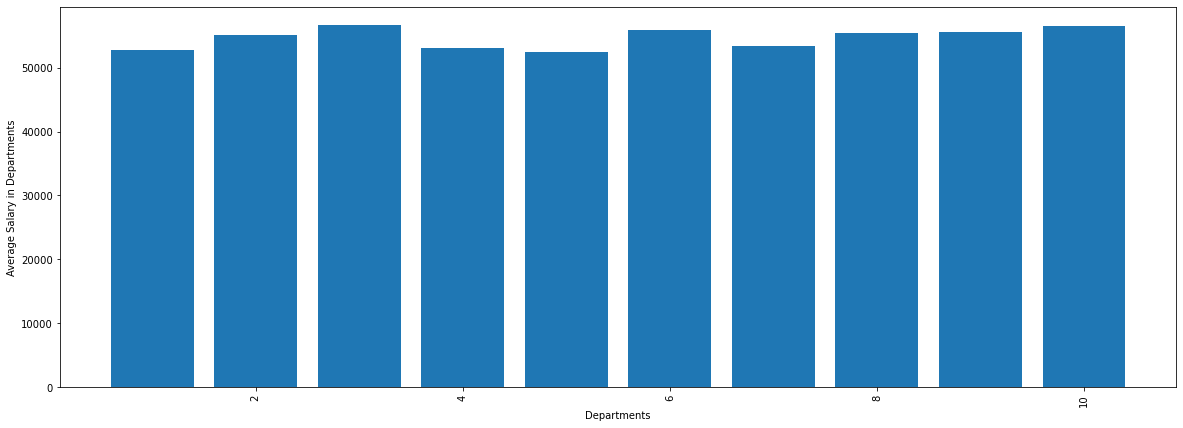

In [20]:
plt.figure(figsize = (20, 7))
plt.bar(grouped_salary.index, grouped_salary.values)
plt.xlabel('Departments')
plt.ylabel('Average Salary in Departments')
plt.xticks(rotation = 90)
plt.show()

##### Q2. Visualize the total number of employees living in each state for each department

In [21]:
merged_data = pd.merge(salary, employee, on = 'Eid')
merged_data

,Dept_Id,Salary,Eid,Name,Last_name,Phone,State
0,2,94852.572130,95-3540363,Jennifer,Johnson,665.770.2397x731,Alabama
1,5,32421.143169,98-7442860,Lisa,Dixon,119-579-0259x306,Indiana
2,5,61828.330430,55-4784969,Christina,Salazar,928.537.4544x0547,North Carolina
3,7,68795.200950,48-5374956,Douglas,Hernandez,001-112-117-8336x2918,South Carolina
4,1,46831.361926,94-3925258,Yolanda,Turner,154.355.0510x508,Pennsylvania
...,...,...,...,...,...,...,...
4995,9,88214.287121,14-9425855,Jonathan,Patterson,+1-040-332-5824x2620,Mississippi
4996,1,59621.357024,35-9632523,Michael,Hall,(806)305-8460x94933,Indiana
4997,9,99576.384985,05-6547333,Stephanie,Wells,+1-340-647-6906x7094,Maine
4998,10,80889.310797,45-9858861,Michelle,Klein,(211)893-0654x18220,Kentucky


In [22]:
merged_data

,Dept_Id,Salary,Eid,Name,Last_name,Phone,State
0,2,94852.572130,95-3540363,Jennifer,Johnson,665.770.2397x731,Alabama
1,5,32421.143169,98-7442860,Lisa,Dixon,119-579-0259x306,Indiana
2,5,61828.330430,55-4784969,Christina,Salazar,928.537.4544x0547,North Carolina
3,7,68795.200950,48-5374956,Douglas,Hernandez,001-112-117-8336x2918,South Carolina
4,1,46831.361926,94-3925258,Yolanda,Turner,154.355.0510x508,Pennsylvania
...,...,...,...,...,...,...,...
4995,9,88214.287121,14-9425855,Jonathan,Patterson,+1-040-332-5824x2620,Mississippi
4996,1,59621.357024,35-9632523,Michael,Hall,(806)305-8460x94933,Indiana
4997,9,99576.384985,05-6547333,Stephanie,Wells,+1-340-647-6906x7094,Maine
4998,10,80889.310797,45-9858861,Michelle,Klein,(211)893-0654x18220,Kentucky


In [25]:
merged_data.groupby(["State", "Dept_Id"]).Eid.count().plot.bar(figsize=(500, 50), fontsize=35, width=0.8)

<AxesSubplot:xlabel='State,Dept_Id'>

##### Q3. Visualize salary distribution of different states

In [26]:
merged_data1 = pd.merge(merged_data, department, on = 'Dept_Id')
merged_data1

,Dept_Id,Salary,Eid,Name,Last_name,Phone,State,Dept_Name
0,2,94852.572130,95-3540363,Jennifer,Johnson,665.770.2397x731,Alabama,D2
1,2,86088.599554,32-0517752,Jennifer,Smith,+1-761-208-5430x758,New Mexico,D2
2,2,33451.843070,56-9653080,Jennifer,Wilson,001-231-187-1413x3189,New Jersey,D2
3,2,37946.085758,72-7768286,Christopher,Gallagher,3349969064,Georgia,D2
4,2,46445.330953,62-2197499,Kelly,Robinson,450.713.8972x56082,Alaska,D2
...,...,...,...,...,...,...,...,...
4995,4,27081.481882,05-8897922,Melissa,Nichols,680.575.9540x375,Montana,D4
4996,4,49933.929583,71-7412358,Keith,Rodriguez,+1-143-535-3552x670,Virginia,D4
4997,4,95187.149987,27-5324072,Kayla,Pacheco,(523)205-8425x5500,Hawaii,D4
4998,4,29260.288070,20-8115824,Cynthia,Harris,344-939-9394,South Dakota,D4


<AxesSubplot:xlabel='State', ylabel='Salary'>

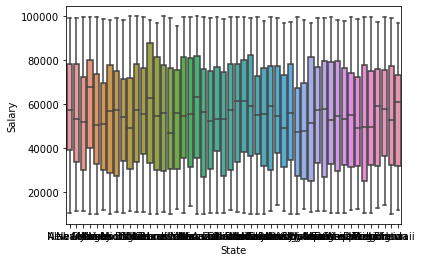

In [32]:
sns.boxplot(data = merged_data1, x = 'State', y = 'Salary', width = 0.8)

##### Q4. Visualize salary distribution of different departments

<AxesSubplot:xlabel='Dept_Name', ylabel='Salary'>

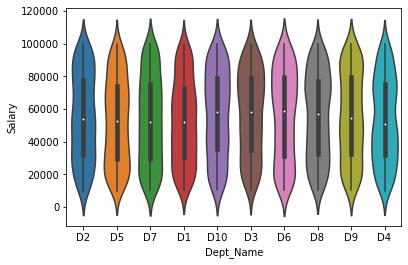

In [34]:
sns.violinplot(data = merged_data1, x = 'Dept_Name', y = 'Salary')